In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load fake regression data
df = pd.read_csv('../DATA/fake_reg.csv')

In [3]:
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


In [4]:
df.describe()

,price,feature1,feature2
count,1000.000000,1000.000000,1000.000000
mean,498.673029,1000.014171,999.979847
std,93.785431,0.974018,0.948330
min,223.346793,997.058347,996.995651
25%,433.025732,999.332068,999.316106
50%,502.382117,1000.009915,1000.002243
75%,564.921588,1000.637580,1000.645380
max,774.407854,1003.207934,1002.666308


<Figure size 864x576 with 0 Axes>

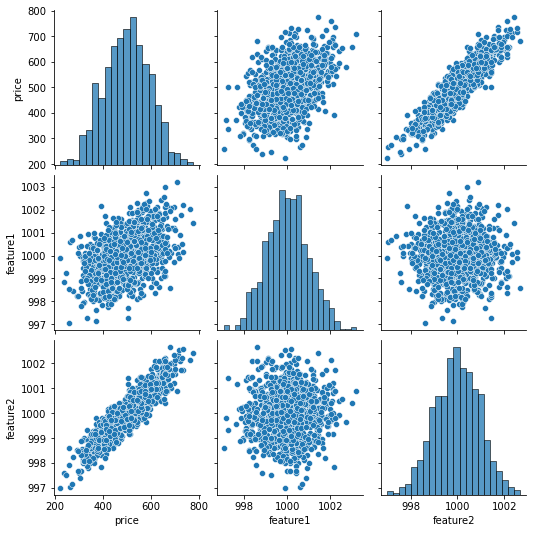

In [5]:
# pairplot to see the correlation
plt.figure(figsize=(12,8))
sns.pairplot(df)

<AxesSubplot:>

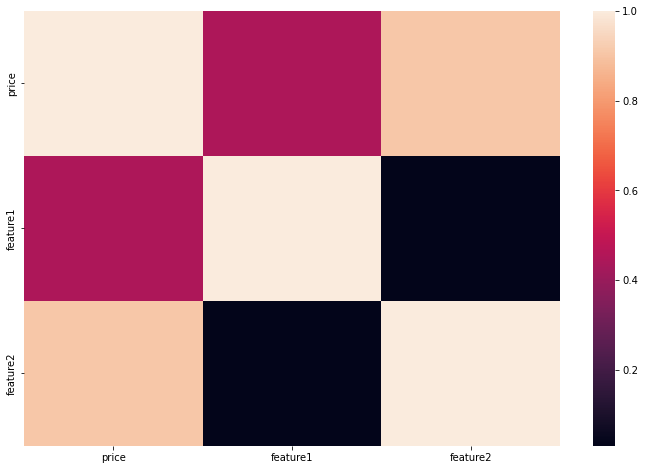

In [6]:
# plot the correlation via heatmap 
plt.figure(figsize=(12,8))
sns.heatmap(df.corr())

##### feature2 has high correlation with price

In [7]:
X = df.drop(['price'], axis=1)
y = df['price']

In [8]:
# X.shape
# y.shape

In [9]:
# train-test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [10]:
X_train.shape

(700, 2)

In [11]:
X_test.shape

(300, 2)

In [12]:
y_train.shape

(700,)

In [13]:
y_test.shape

(300,)

In [14]:
# Scaling and normalization of training 

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [15]:
# only fit to training data not to test data to avoid data leakage
X_train = scaler.fit_transform(X_train.values)
X_test = scaler.transform(X_test.values)

In [16]:
# Buliding Artificial Neural Network (ANN) model 

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

In [17]:
# building sequential neural-network model

model = Sequential()

model.add(Dense(4, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(4, activation='relu'))

# final output network
model.add(Dense(1))

#compile
model.compile(optimizer='rmsprop', loss='mse')

2023-03-27 11:13:22.062450: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [18]:
model.fit(X_train, y_train, epochs=300)

Epoch 1/300
22/22 [==============================] - 0s 679us/step - loss: 256651.8906
Epoch 2/300
22/22 [==============================] - 0s 665us/step - loss: 256552.1094
Epoch 3/300
22/22 [==============================] - 0s 617us/step - loss: 256449.9688
Epoch 4/300
22/22 [==============================] - 0s 656us/step - loss: 256337.9219
Epoch 5/300
22/22 [==============================] - 0s 618us/step - loss: 256215.4531
Epoch 6/300
22/22 [==============================] - 0s 621us/step - loss: 256080.1562
Epoch 7/300
22/22 [==============================] - 0s 704us/step - loss: 255933.2969
Epoch 8/300
22/22 [==============================] - 0s 598us/step - loss: 255773.1250
Epoch 9/300
22/22 [==============================] - 0s 629us/step - loss: 255597.9219
Epoch 10/300
22/22 [==============================] - 0s 645us/step - loss: 255407.5000
Epoch 11/300
22/22 [==============================] - 0s 664us/step - loss: 255202.9531
Epoch 12/300
22/22 [=====================

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 12        
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________


#### Cost function (loss) 

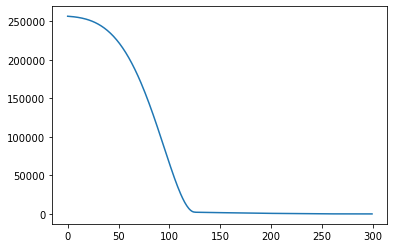

In [20]:
losses = pd.Series(model.history.history)
plt.plot(losses['loss'])

#### Model Evaluation

In [21]:
training_score = model.evaluate(X_train,y_train)

22/22 [==============================] - 0s 539us/step - loss: 24.6144


In [22]:
test_score = model.evaluate(X_test,y_test)

10/10 [==============================] - 0s 620us/step - loss: 25.4455


#### Model prediction

In [23]:
y_pred = model.predict(X_test)

In [24]:
pred_df = pd.DataFrame(y_test.values,columns=['Test Y'])

# y_pred.shape
test_prediction = pd.Series(y_pred.reshape(300,))

In [25]:
pred_df = pd.concat([pred_df,test_prediction], axis=1)
pred_df.columns = ['Test Y','Model Predictions']

In [26]:
pred_df

,Test Y,Model Predictions
0,402.296319,405.572784
1,624.156198,622.506714
2,582.455066,591.135254
3,578.588606,571.852112
4,371.224104,367.801270
...,...,...
295,525.704657,528.880188
296,502.909473,515.770325
297,612.727910,608.626770
298,417.569725,416.853607


<AxesSubplot:xlabel='Test Y', ylabel='Model Predictions'>

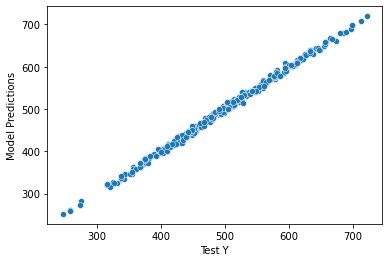

In [30]:
# scatterplot between actual and predicted Y
sns.scatterplot(x='Test Y', y='Model Predictions', data=pred_df)

#### Error between actual and predicted 

In [31]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [35]:
error = mean_squared_error(pred_df['Test Y'],pred_df['Model Predictions'])
error

25.445550021325623

In [36]:
error = mean_absolute_error(pred_df['Test Y'],pred_df['Model Predictions'])
error

4.07048846125964

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

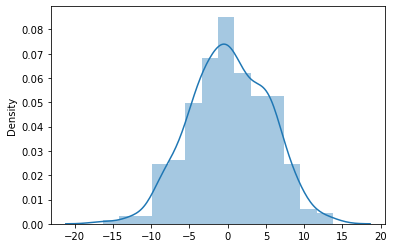

In [38]:
diff = pred_df['Test Y'] - pred_df['Model Predictions']
sns.distplot(diff)